# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.describe()

year
count   962.00
mean  1,971.82
std      33.81
min   1,901.00
25%   1,948.00
50%   1,977.00
75%   2,001.00
max   2,020.00

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [8]:
df_data.sort_values("year").head(1)

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name  birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD

In [9]:
df_data.sort_values("year").tail(1)

year category                            prize  \
961  2020  Physics  The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
961  “for the discovery that black hole formation i...         1/2   

    laureate_type      full_name  birth_date  birth_city   birth_country  \
961    Individual  Roger Penrose  1931-08-08  Colchester  United Kingdom   

    birth_country_current   sex     organization_name organization_city  \
961        United Kingdom  Male  University of Oxford            Oxford   

    organization_country  ISO  
961       United Kingdom  GBR

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [10]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [11]:
df_data.isna().values.any()

True

In [12]:
nan_in_columns = []
for i in df_data.columns:
    nan_in_columns.append(f"{i} have NaN is :{df_data[i].isna().values.any()}")
nan_in_columns

['year have NaN is :False',
 'category have NaN is :False',
 'prize have NaN is :False',
 'motivation have NaN is :True',
 'prize_share have NaN is :False',
 'laureate_type have NaN is :False',
 'full_name have NaN is :False',
 'birth_date have NaN is :True',
 'birth_city have NaN is :True',
 'birth_country have NaN is :True',
 'birth_country_current have NaN is :True',
 'sex have NaN is :True',
 'organization_name have NaN is :True',
 'organization_city have NaN is :True',
 'organization_country have NaN is :True',
 'ISO have NaN is :True']

In [13]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [14]:
nan_in_columns_count = []
for i in df_data.columns:
    nan_in_columns_count.append(f"{i} have NaN count :{df_data[i].isna().sum()}")
nan_in_columns_count

['year have NaN count :0',
 'category have NaN count :0',
 'prize have NaN count :0',
 'motivation have NaN count :88',
 'prize_share have NaN count :0',
 'laureate_type have NaN count :0',
 'full_name have NaN count :0',
 'birth_date have NaN count :28',
 'birth_city have NaN count :31',
 'birth_country have NaN count :28',
 'birth_country_current have NaN count :28',
 'sex have NaN count :28',
 'organization_name have NaN count :255',
 'organization_city have NaN count :255',
 'organization_country have NaN count :254',
 'ISO have NaN count :28']

In [15]:
df_data["sex"].isna().sum()

28

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [16]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])

In [17]:
df_data_year = pd.to_datetime(df_data["year"])

In [18]:
# for i in df_data_year:
#     df_data["year"] = i.year

In [19]:
df_data["year"]

0      1901
1      1901
2      1901
3      1901
4      1901
       ... 
957    2020
958    2020
959    2020
960    2020
961    2020
Name: year, Length: 962, dtype: int64

In [20]:
type(df_data["prize_share"][0])

str

In [21]:
df_data["prize_share"][0]

'1/1'

#### Add a Column with the Prize Share as a Percentage

In [22]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

In [23]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      o

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [24]:
pie_data = df_data["sex"].value_counts()

fig = px.pie(names=pie_data.index,values=pie_data.values,hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [25]:
df_data[df_data["sex"]=="Female"].head(3)

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [26]:
df_data["full_name"].duplicated().values.any()

True

In [27]:
df_data["full_name"].duplicated().values.sum()

7

In [28]:
df_data[df_data["full_name"].duplicated()]

year   category                              prize  \
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
215  1944      Peace         The Nobel Peace Prize 1944   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
62   "in recognition of her services to the advance...         1/1   
215                                                NaN         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
62     Individual                        Marie Curie, née Sklodowska   
215  Organization  Comité international de la Croix Rouge (Intern...   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
62  1867-11-07        Warsaw   Russian Empire (Poland)   
215        NaT           NaN                       NaN   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
62                     Poland  Female   
215                       NaN     NaN   
340  United States of America    Male   
348                       NaN     NaN   
424  United States of America    Male   
505            United Kingdom    Male   
523                       NaN     NaN   

                                organization_name organization_city  \
62                            Sorbonne University             Paris   
215                                           NaN               NaN   
340  California Institute of Technology (Caltech)      Pasadena, CA   
348                                           NaN               NaN   
424                        University of Illinois        Urbana, IL   
505           MRC Laboratory of Molecular Biology         Cambridge   
523                                           NaN               NaN   

         organization_country  ISO  share_pct  
62                     France  POL       1.00  
215                       NaN  NaN       1.00  
340  United States of America  USA       1.00  
348                       NaN  NaN       0.50  
424  United States of America  USA       0.33  
505            United Kingdom  GBR       0.25  
523                       NaN  NaN       1.00

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [29]:
df_data["category"].value_counts()

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

In [30]:
df_bar = df_data["category"].value_counts()

In [31]:
fig = px.bar(x=df_bar.index,y=df_bar.values,title="Noble price given by Category",color = df_bar.values,
        color_continuous_scale='Aggrnyl',)
fig.update_layout(xaxis_title='Category', yaxis_title='Prizes',coloraxis_showscale=False)
fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [32]:
df_data[df_data["category"]=="Economics"].head(3)

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
393               Netherlands  NLD       0.50  
394                    Norway  NOR       0.50  
402  United States of America  USA       1.00

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [33]:
df_data[["category","sex"]].value_counts()

category    sex   
Physics     Male      212
Medicine    Male      210
Chemistry   Male      179
Literature  Male      101
Peace       Male       90
Economics   Male       84
Peace       Female     17
Literature  Female     16
Medicine    Female     12
Chemistry   Female      7
Physics     Female      4
Economics   Female      2
Name: count, dtype: int64

In [34]:
df_bar_split = df_data.groupby(["category","sex"],as_index=False).agg({"prize":"count"})
df_bar_split = df_bar_split.sort_values("prize",ascending=False)
df_bar_split

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [35]:
fig = px.bar(x=df_bar_split.category,y=df_bar_split.prize,title="Noble price given by Category splitted by Men and Women",color = df_bar_split.sex,
        color_continuous_scale='Aggrnyl',)
fig.update_layout(xaxis_title='Category', yaxis_title='Prizes',coloraxis_showscale=False)
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [36]:
prize_per_year = df_data.groupby("year").agg({"prize":"count"})
prize_per_year

prize
year       
1901      6
1902      7
1903      7
1904      6
1905      5
...     ...
2016     11
2017     12
2018     13
2019     14
2020     12

[117 rows x 1 columns]

In [37]:
moving_average = prize_per_year.rolling(window=5).mean()
moving_average

prize
year       
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   6.20
...     ...
2016  11.60
2017  12.00
2018  12.00
2019  12.20
2020  12.40

[117 rows x 1 columns]

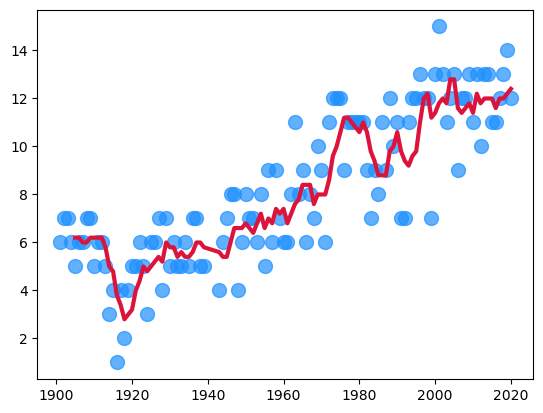

In [38]:
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 

plt.plot(prize_per_year.index, 
    moving_average.values, 
    c='crimson', 
    linewidth=3,)
plt.show()

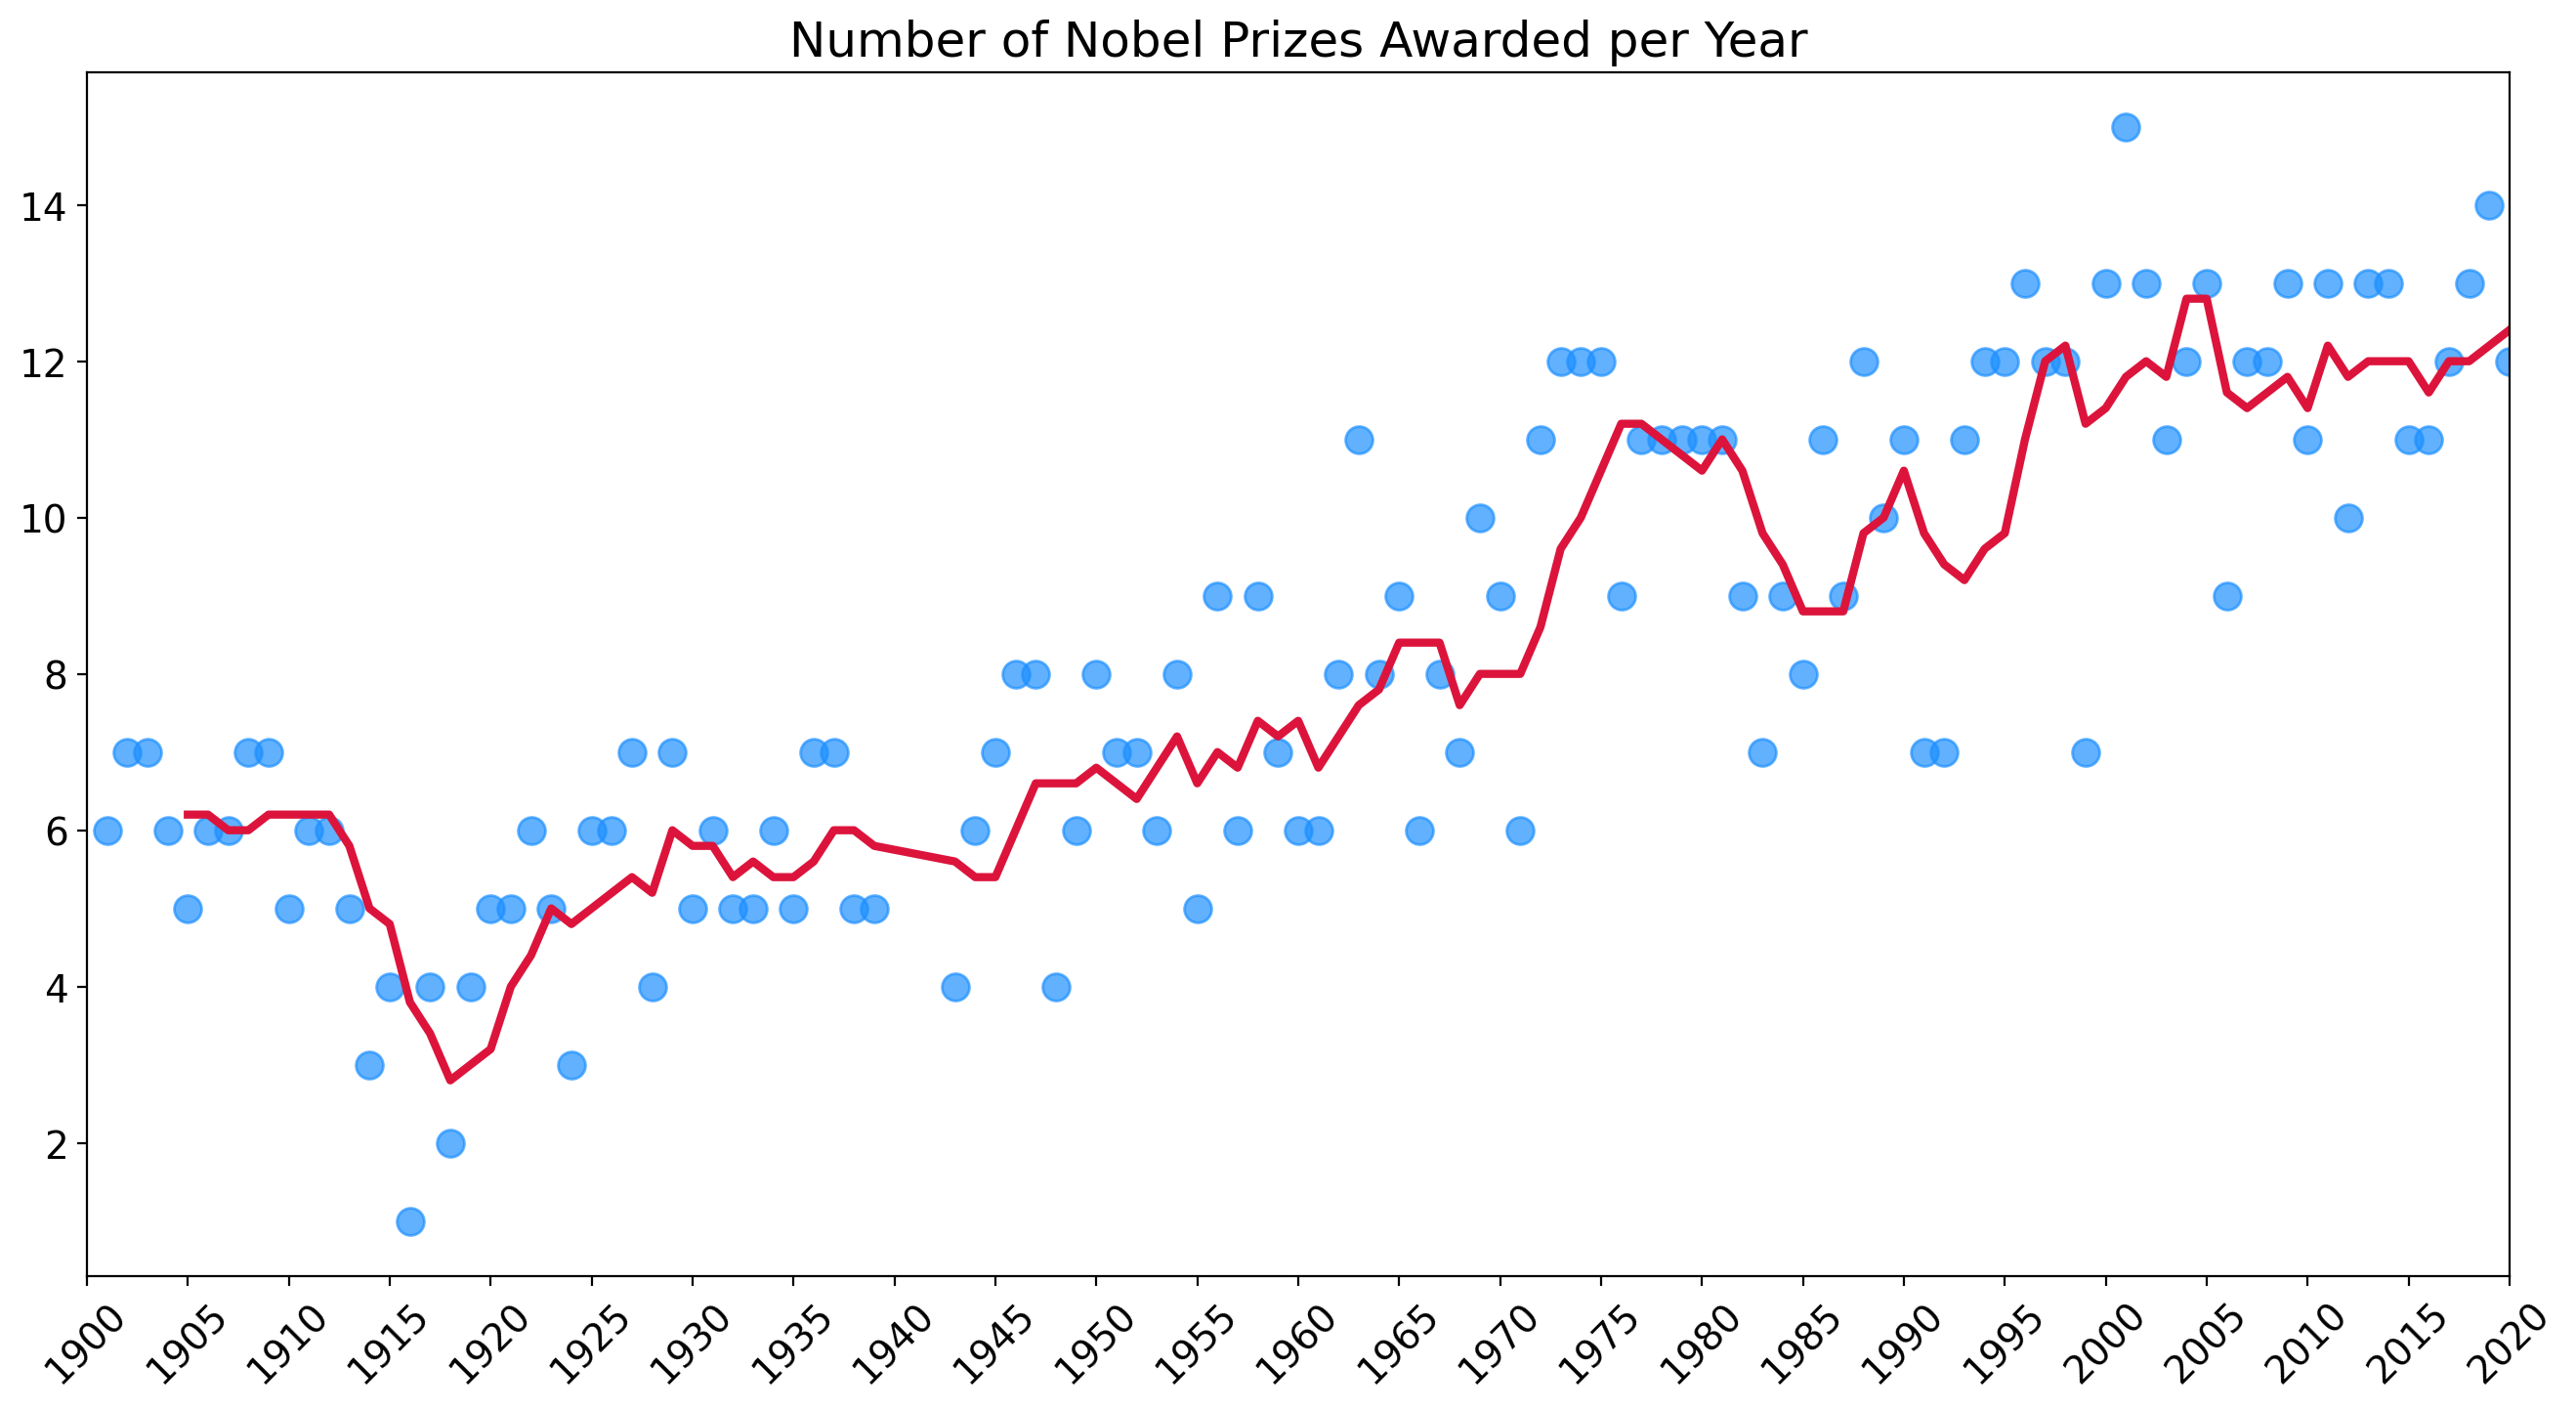

In [39]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [40]:
df_data.head(2)

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00

In [41]:
avg_prize_share = df_data.groupby("year").agg({"share_pct":"mean"})
avg_prize_share

share_pct
year           
1901       0.83
1902       0.71
1903       0.71
1904       0.83
1905       1.00
...         ...
2016       0.55
2017       0.50
2018       0.46
2019       0.43
2020       0.50

[117 rows x 1 columns]

In [42]:
moving_average_share = avg_prize_share.rolling(window=5).mean()
moving_average_share

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]

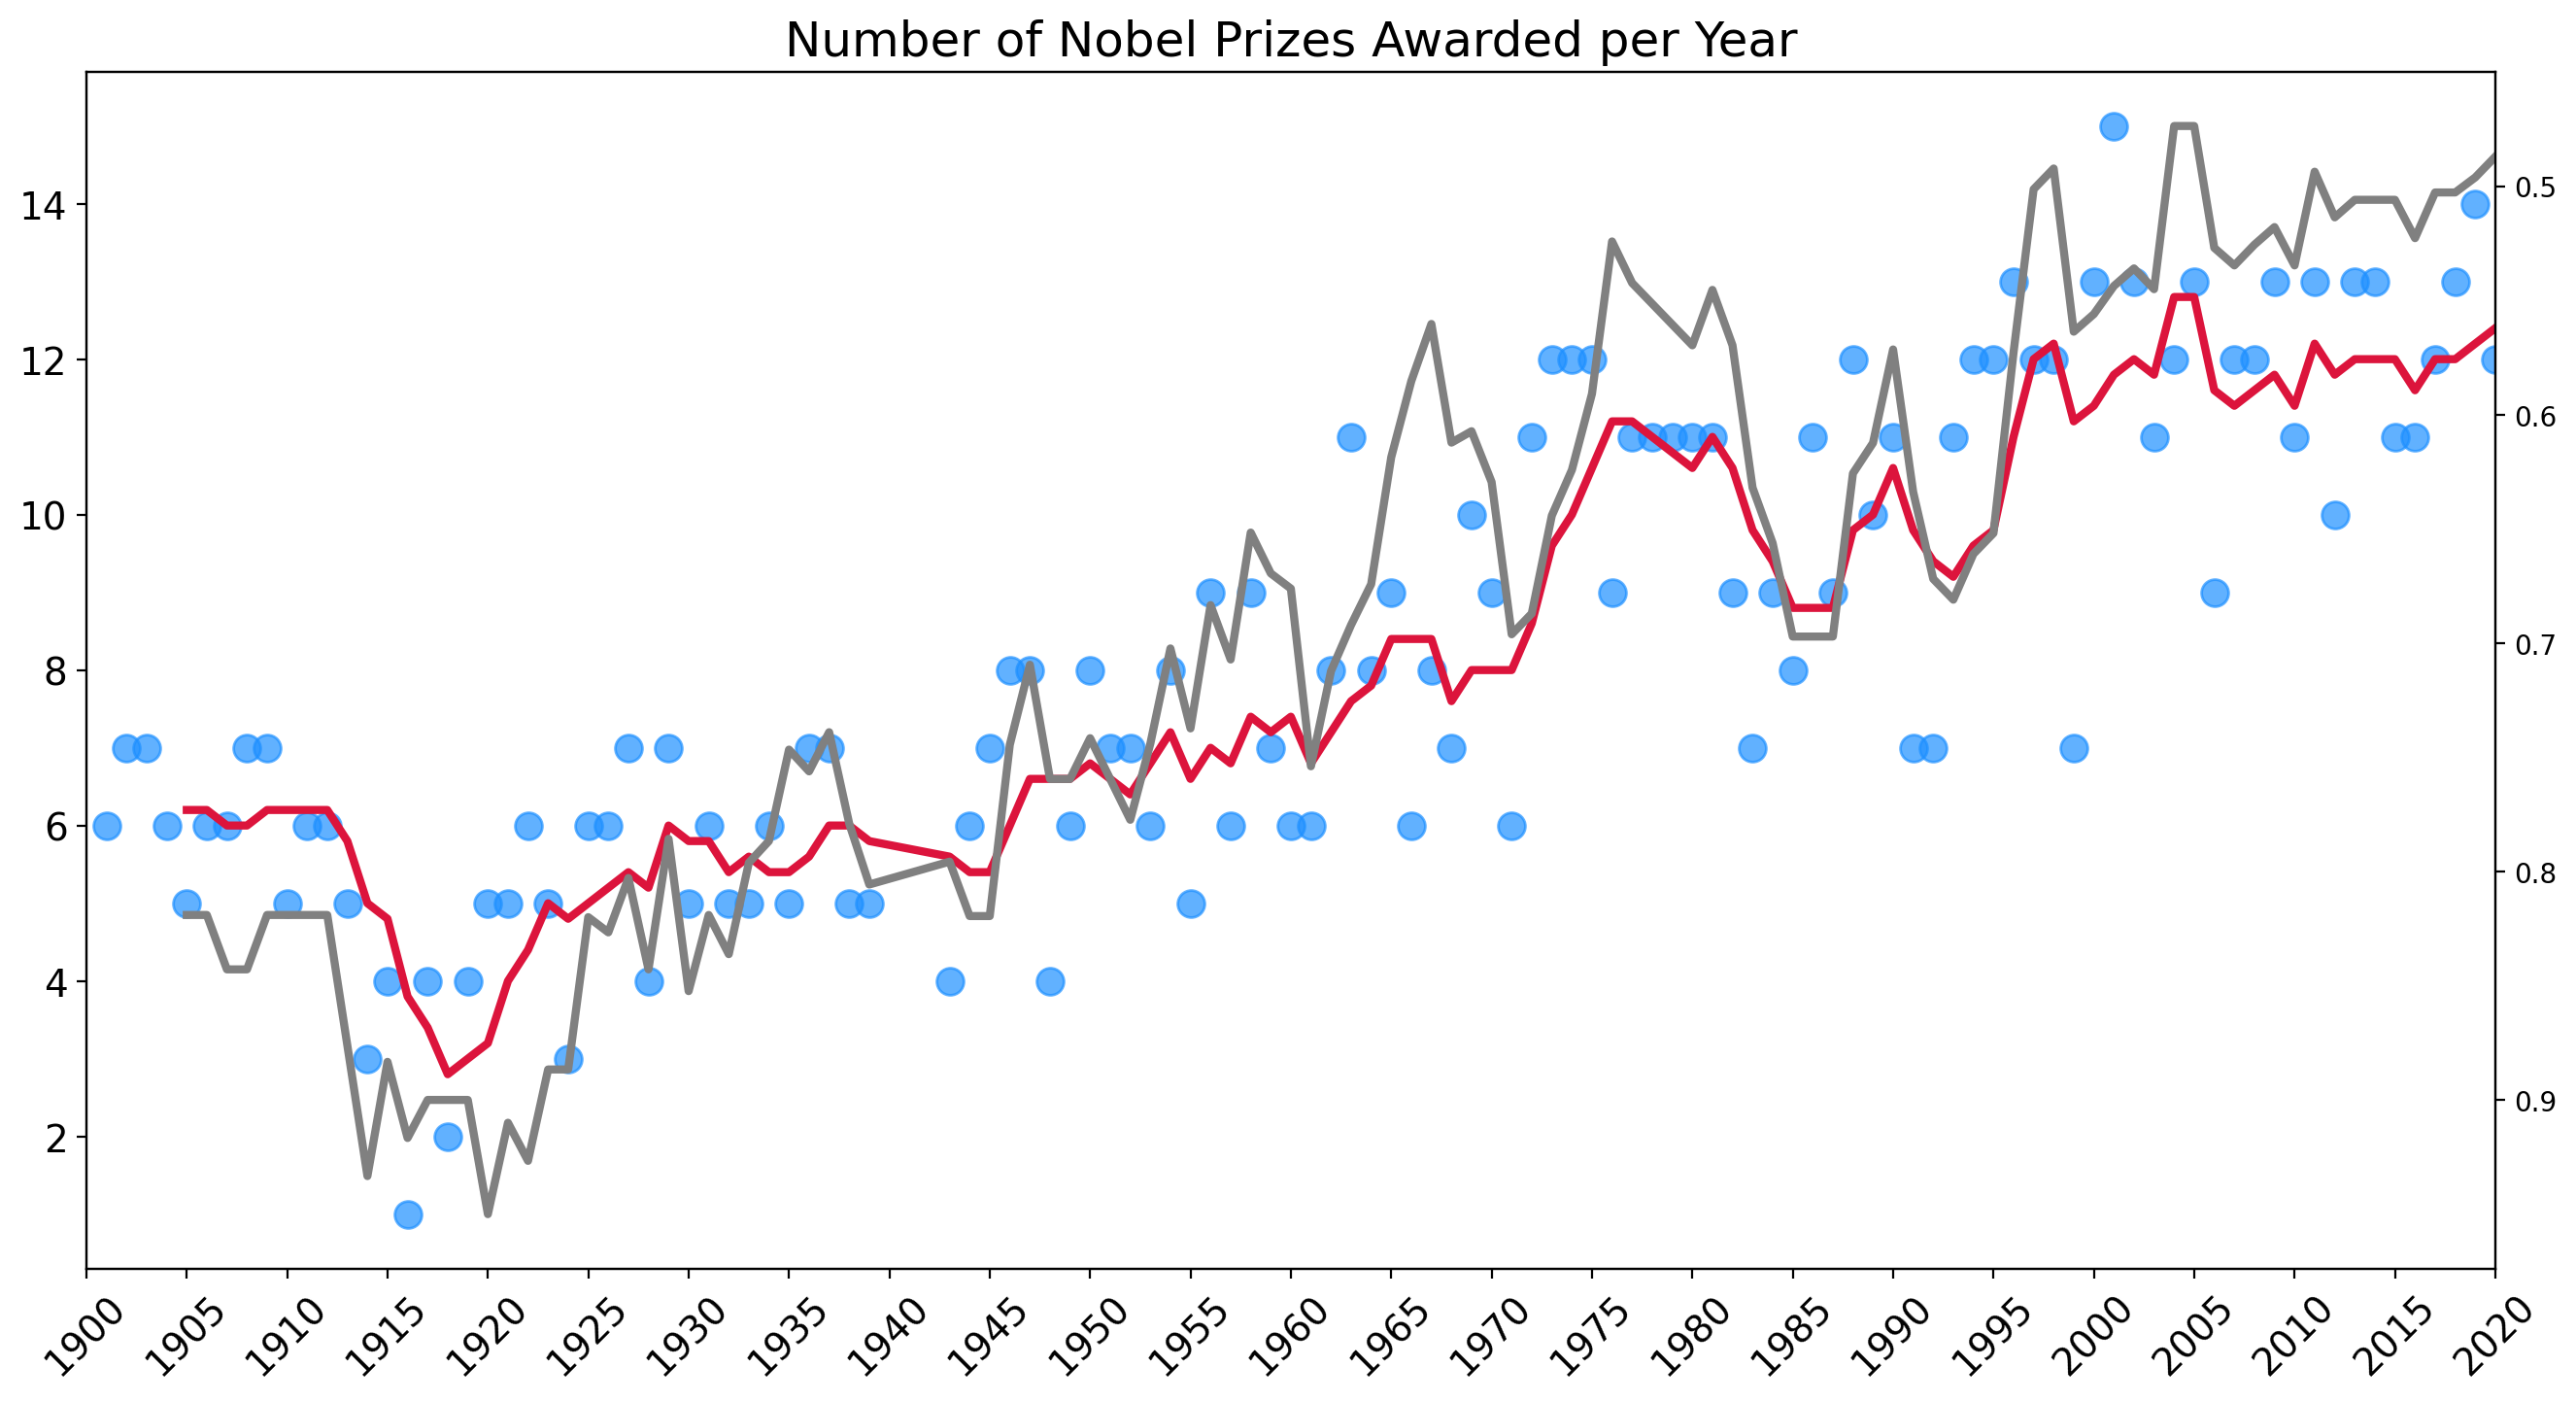

In [43]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
# ax2.scatter(x=avg_prize_share.index, 
#            y=avg_prize_share.values, 
#            c='dodgerblue',
#            alpha=0.7,
#            s=100,)

ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

ax2.plot(avg_prize_share.index, 
        moving_average_share.values, 
        c='gray', 
        linewidth=3,)
ax2.invert_yaxis()
 
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [44]:
df_data.head(1)

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00

In [45]:
df_top_20_country = df_data.groupby("birth_country_current",as_index=False).agg({"prize":"count"})
df_top_20_country =  df_top_20_country.sort_values("prize",ascending=False)
df_top_20_country = df_top_20_country[:20]
df_top_20_country = df_top_20_country.sort_values("prize",ascending=True)
df_top_20_country

birth_country_current  prize
65              South Africa      9
7                    Belgium      9
33                     India      9
2                  Australia     10
54                    Norway     12
13                     China     12
20                   Denmark     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
57                    Poland     27
40                     Japan     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

In [46]:
fig = px.bar(x=df_top_20_country.prize,y=df_top_20_country.birth_country_current,orientation="h",color=df_top_20_country.prize)
fig.update_layout(xaxis_title ="Number of prizes" ,yaxis_title = "Country",coloraxis_showscale=False)
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [47]:
df_data["ISO"][0]

'NLD'

In [48]:
df_top_20_code = []
df_top_20_code_values=[]

for i in df_top_20_country.birth_country_current:
    a = df_data[df_data["birth_country_current"]==i]
    df_top_20_code.append(a["ISO"].value_counts())
  
num=0
for i in df_top_20_code:   
     a = df_top_20_code[num].index
     df_top_20_code_values.append(a[0])
     num+=1
df_top_20_code_values

['ZAF',
 'BEL',
 'IND',
 'AUS',
 'NOR',
 'CHN',
 'DNK',
 'NLD',
 'AUT',
 'ITA',
 'CHE',
 'CAN',
 'RUS',
 'POL',
 'JPN',
 'SWE',
 'FRA',
 'DEU',
 'GBR',
 'USA']

In [49]:
df_country_code_series = pd.Series(data=df_top_20_code_values)

In [50]:
type(df_country_code_series)

pandas.core.series.Series

In [51]:
fig = px.choropleth(locations=df_country_code_series,color=df_top_20_country.prize,hover_name=df_top_20_country.birth_country_current,
                   color_continuous_scale=px.colors.sequential.matter)
fig.update_layout(coloraxis_showscale=True,)
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [52]:
df_top_20_country_category = df_data.groupby(["birth_country_current","category"],as_index=False).agg({"prize":"count"})
# df_top_20_country_category =  df_top_20_country_category.sort_values("prize",ascending=False)
# df_top_20_country_category = df_top_20_country_category[:20]
# df_top_20_country_category = df_top_20_country_category.sort_values("prize",ascending=True)
df_top_20_country_category

birth_country_current    category  prize
0                     Algeria  Literature      1
1                     Algeria     Physics      1
2                   Argentina    Medicine      2
3                   Argentina       Peace      2
4                   Australia   Chemistry      1
..                        ...         ...    ...
206  United States of America     Physics     70
207                 Venezuela    Medicine      1
208                   Vietnam       Peace      1
209                     Yemen       Peace      1
210                  Zimbabwe       Peace      1

[211 rows x 3 columns]

In [53]:
df_top_20_country_category.sort_values(by='prize', ascending=False, inplace=True)
df_top_20_country_category

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [54]:
merged_df = pd.merge(df_top_20_country,df_top_20_country_category,on="birth_country_current")
merged_df

birth_country_current  prize_x    category  prize_y
0                South Africa        9       Peace        3
1                South Africa        9    Medicine        3
2                South Africa        9  Literature        2
3                South Africa        9   Chemistry        1
4                     Belgium        9       Peace        3
..                        ...      ...         ...      ...
104  United States of America      281     Physics       70
105  United States of America      281   Chemistry       55
106  United States of America      281   Economics       49
107  United States of America      281       Peace       19
108  United States of America      281  Literature       10

[109 rows x 4 columns]

In [55]:
merged_df = merged_df.rename(columns={"prize_x":"total_prize","prize_y":"category_prize"})
merged_df

birth_country_current  total_prize    category  category_prize
0                South Africa            9       Peace               3
1                South Africa            9    Medicine               3
2                South Africa            9  Literature               2
3                South Africa            9   Chemistry               1
4                     Belgium            9       Peace               3
..                        ...          ...         ...             ...
104  United States of America          281     Physics              70
105  United States of America          281   Chemistry              55
106  United States of America          281   Economics              49
107  United States of America          281       Peace              19
108  United States of America          281  Literature              10

[109 rows x 4 columns]

In [56]:
cat_cntry_bar = px.bar(x=merged_df.total_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

In [57]:
cat_cntry_bar = px.bar(x=merged_df.total_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category_prize,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [58]:
df_line_chart = df_data.groupby(["birth_country_current","year"],as_index=False).agg({"prize":"count"})
df_line_chart = df_line_chart.sort_values(["birth_country_current"])
df_line_chart

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      1
2                   Argentina  1936      1
3                   Argentina  1947      1
4                   Argentina  1980      1
..                        ...   ...    ...
567  United States of America  1961      2
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [59]:
cumulative_cals = df_line_chart.groupby(["birth_country_current","year"]).sum().groupby(level=[0]).cumsum()
cumulative_cals.reset_index(inplace=True)
cumulative_cals

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [60]:
fig = px.line(x=cumulative_cals.year,y=cumulative_cals.prize,color=cumulative_cals.birth_country_current,hover_name=cumulative_cals.birth_country_current)

fig.update_layout(xaxis_title='Year',yaxis_title='Number of Prizes')
fig.show()



# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [61]:
bar_chart_org_df = df_data[df_data["laureate_type"]=="Individual"].groupby("organization_name",as_index=False).agg({"prize":"count"}).sort_values("prize",ascending=False)

In [62]:
bar_chart_org_df = bar_chart_org_df[:20]
bar_chart_org_df

organization_name  prize
196                      University of California     40
68                             Harvard University     29
167                           Stanford University     23
117   Massachusetts Institute of Technology (MIT)     21
198                         University of Chicago     20
197                       University of Cambridge     18
26   California Institute of Technology (Caltech)     17
38                            Columbia University     17
146                          Princeton University     15
152                        Rockefeller University     13
119                           Max-Planck-Institut     13
222                          University of Oxford     12
111           MRC Laboratory of Molecular Biology     10
258                               Yale University      9
40                             Cornell University      8
12                              Bell Laboratories      8
109                             London University      7
163                           Sorbonne University      7
67                         Harvard Medical School      7
192                     University College London      7

In [63]:
fig = px.bar(x=bar_chart_org_df.prize,y=bar_chart_org_df.organization_name,orientation="h",color=bar_chart_org_df.prize,color_continuous_scale=px.colors.sequential.haline,title='Top 20 Research Institutions by Number of Prizes')
fig.update_layout(xaxis_title ="Number of prizes" ,yaxis_title = "Organization name",coloraxis_showscale=False)
fig.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [64]:
bar_chart_city_df = df_data[df_data["laureate_type"]=="Individual"].groupby("organization_city",as_index=False).agg({"prize":"count"}).sort_values("prize",ascending=False)

In [65]:
bar_chart_city_df = bar_chart_city_df[:20]
bar_chart_city_df

organization_city  prize
34      Cambridge, MA     50
121      New York, NY     45
33          Cambridge     31
92             London     27
128             Paris     25
156      Stanford, CA     24
12       Berkeley, CA     21
39        Chicago, IL     20
135     Princeton, NJ     19
129      Pasadena, CA     17
126            Oxford     12
13             Berlin     12
157         Stockholm     10
108            Moscow     10
71         Heidelberg      9
110            Munich      9
23         Boston, MA      9
119     New Haven, CT      9
78         Ithaca, NY      8
65          Göttingen      8

In [66]:
fig = px.bar(x=bar_chart_city_df.prize,y=bar_chart_city_df.organization_city,orientation="h",color=bar_chart_city_df.prize)
fig.update_layout(xaxis_title ="Number of prizes" ,yaxis_title = "Organization City",coloraxis_showscale=False)
fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [67]:
df_data.head(2)

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00

In [68]:
bar_chart_city_birth_df = df_data[df_data["laureate_type"]=="Individual"].groupby("birth_city",as_index=False).agg({"prize":"count"}).sort_values("prize",ascending=False)

In [69]:
bar_chart_city_birth_df = bar_chart_city_birth_df[:20]
bar_chart_city_birth_df

birth_city  prize
381           New York, NY     53
417                  Paris     26
313                 London     19
568                 Vienna     14
112            Chicago, IL     12
48                  Berlin     11
586         Washington, DC      8
80                Budapest      8
76            Brooklyn, NY      8
64              Boston, MA      8
358                 Moscow      7
363                 Munich      7
513              Stockholm      6
210                Hamburg      6
439                 Prague      5
167  Frankfurt-on-the-Main      5
356               Montreal      4
87                   Cairo      4
427         Pittsburgh, PA      4
559                Uppsala      3

In [70]:
fig = px.bar(x=bar_chart_city_birth_df.prize,y=bar_chart_city_birth_df.birth_city,orientation="h",color=bar_chart_city_birth_df.prize)
fig.update_layout(xaxis_title ="Number of prizes" ,yaxis_title = "Birth City",coloraxis_showscale=False)
fig.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [71]:
df_data.head(1)

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00

In [72]:
sun_burst_df = df_data.groupby(["organization_country","organization_city","organization_name"],as_index=False).agg({"prize":"count"})

In [73]:
sun_burst_df = sun_burst_df.sort_values("prize",ascending=False)
sun_burst_df

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [74]:
fig = px.sunburst(path=[sun_burst_df.organization_country,sun_burst_df.organization_city,sun_burst_df.organization_name], values=sun_burst_df.prize)
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [75]:

# birth_list = []
# for i in df_data["birth_date"]:
#     birth_list.append(i.year)

In [76]:
# age_list = []
# num=0
# for i in df_data["year"]:
#     age = i- birth_list[num]
#     age_list.append(age)
#     num+=1

In [77]:
# df_data["winning_age"] = age_list

In [78]:
birth_years = df_data.birth_date.dt.year
df_data['winning_age'] = df_data.year - birth_years

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [79]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU       0.33        97.00

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK       0.50        17.00

In [80]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

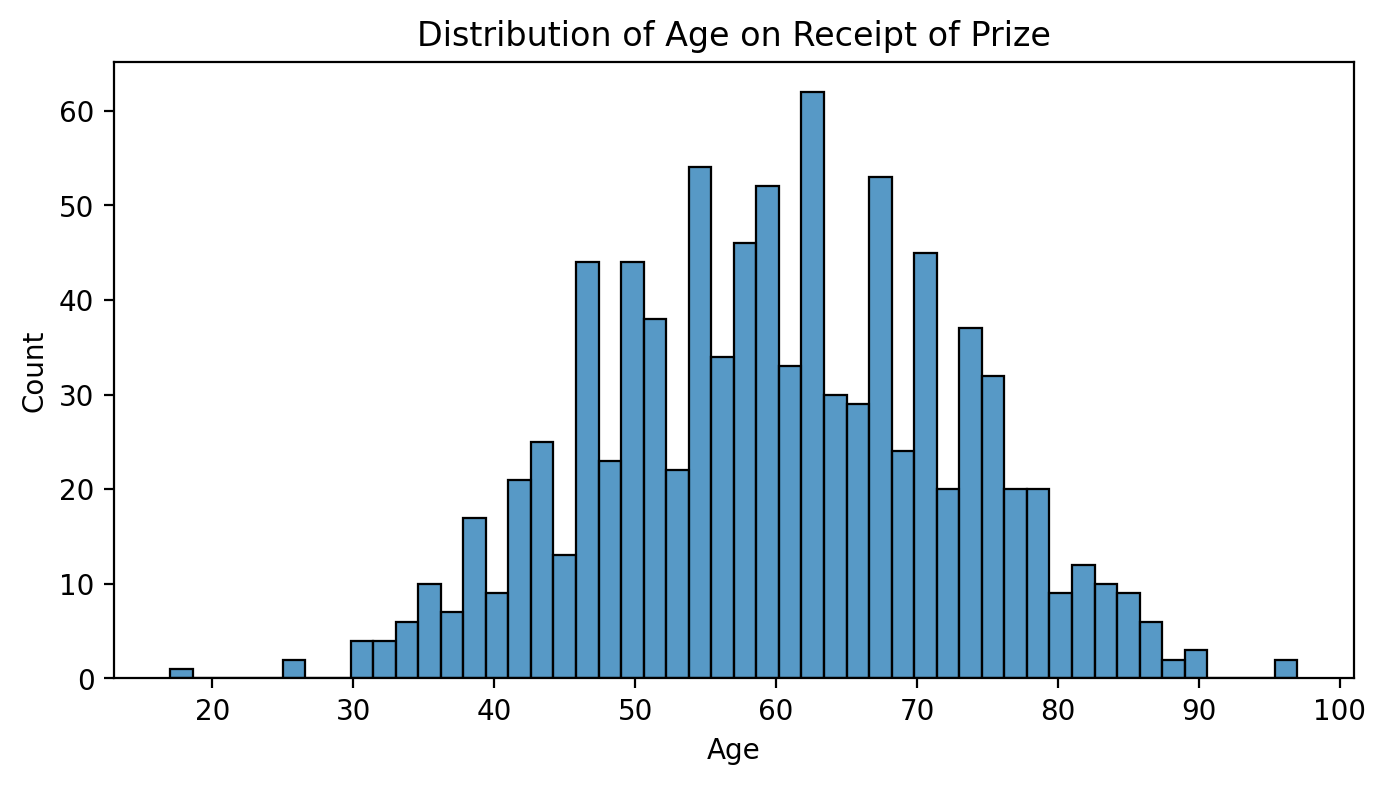

In [81]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=50)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


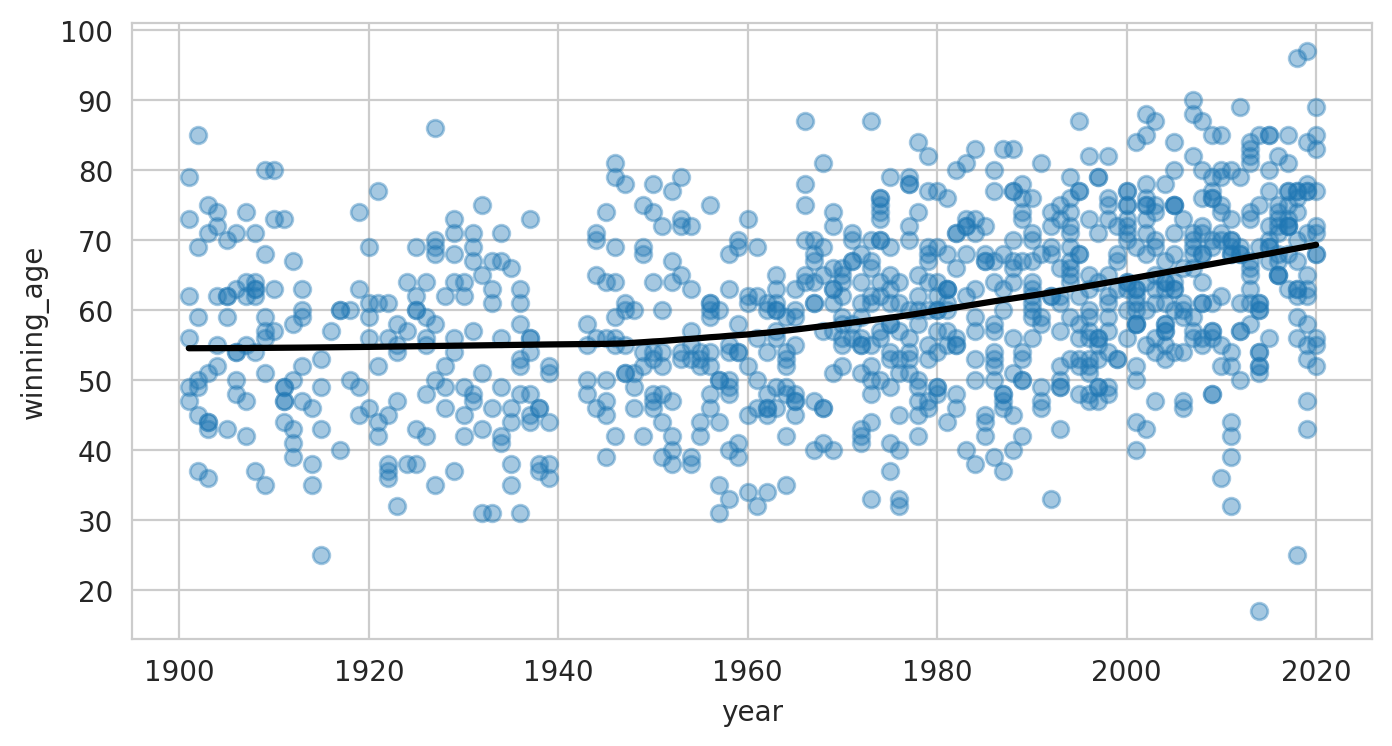

In [82]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

<Axes: xlabel='category', ylabel='winning_age'>

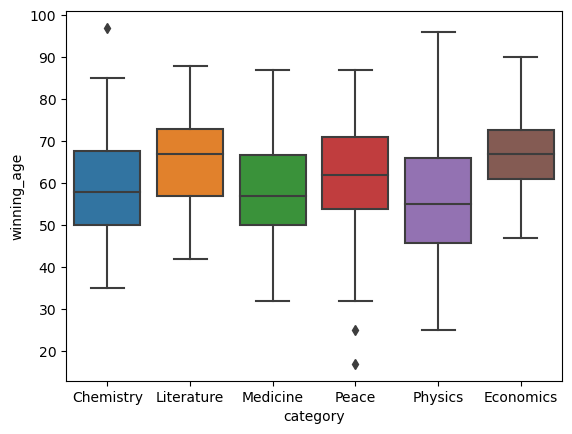

In [83]:
sns.boxplot(x=df_data["category"],y=df_data["winning_age"])

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


C:\Users\aezhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



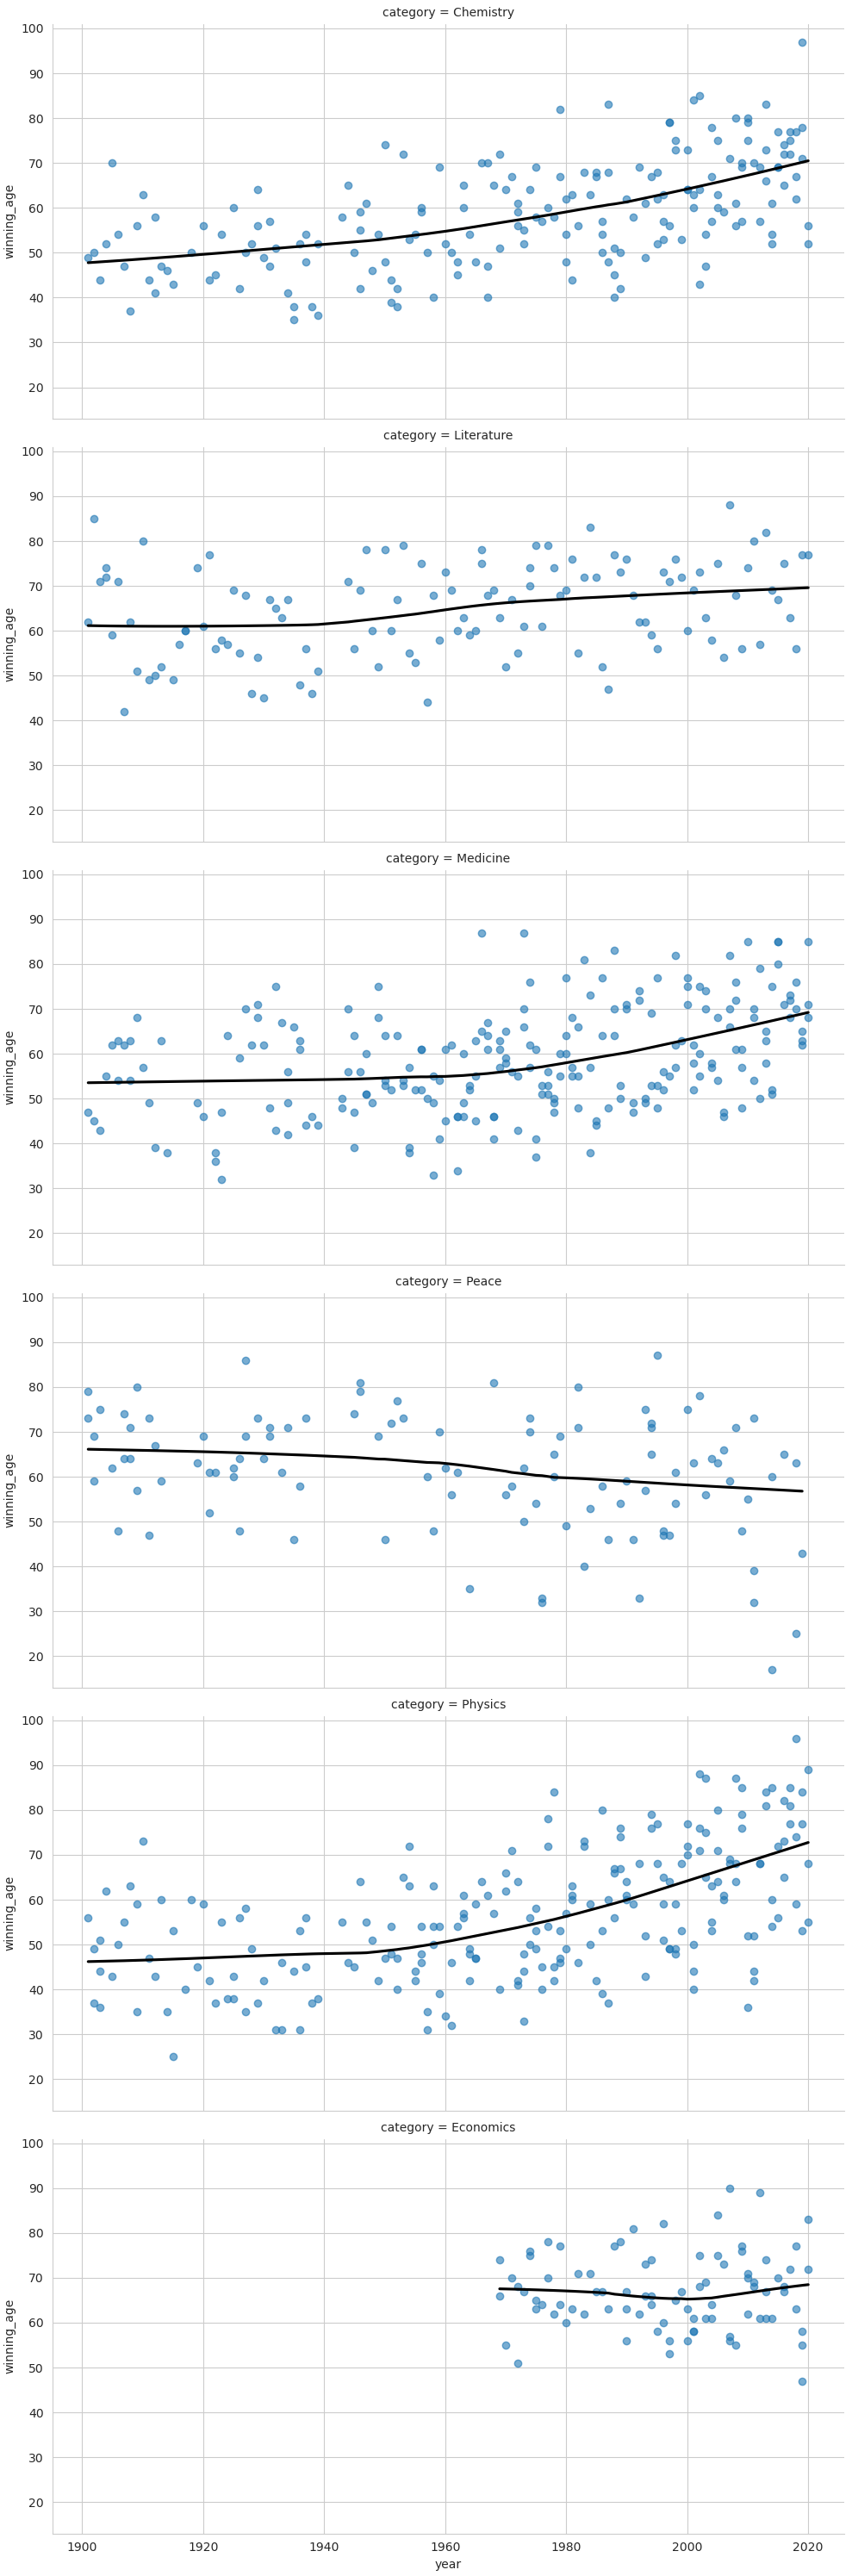

In [84]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

C:\Users\aezhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



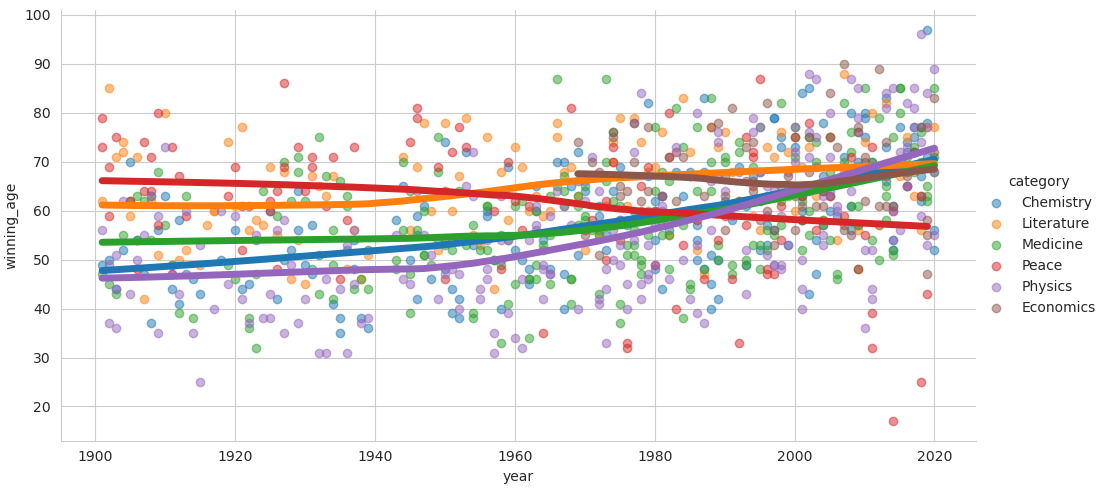

In [85]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()